### Importando...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from sklearn import model_selection
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

### Análise exploratória dos dados

In [2]:
treino = pd.read_csv('treino.csv')
teste = pd.read_csv('teste.csv')

In [3]:
treino.head()

0   1   2   3  4  5   6   7   8  9
0  0  38  19  11  5  3  32  21  11  2
1  0  34  19   9  7  3  27  21   6  0
2  0  32  19   9  5  5  27  17  10  1
3  0  31  19   9  4  6  35  25  10  1
4  0  29  19   8  5  6  30  26   4  3

In [4]:
# Verificar valores nulos no dataset

print("Valores Nulos Treino:",treino.isnull().sum().sum(),"Valores Nulos Teste:",teste.isnull().sum().sum()  )

Valores Nulos Treino: 0 Valores Nulos Teste: 0


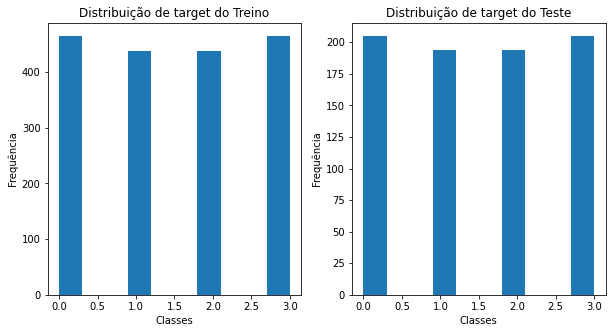

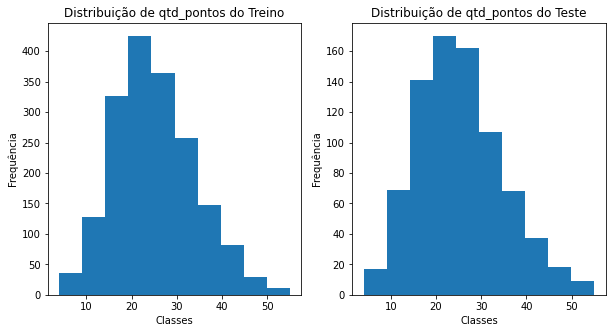

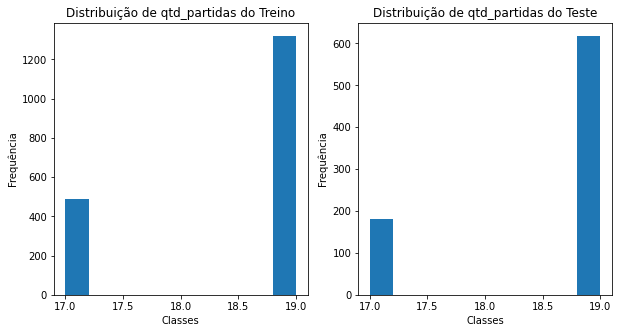

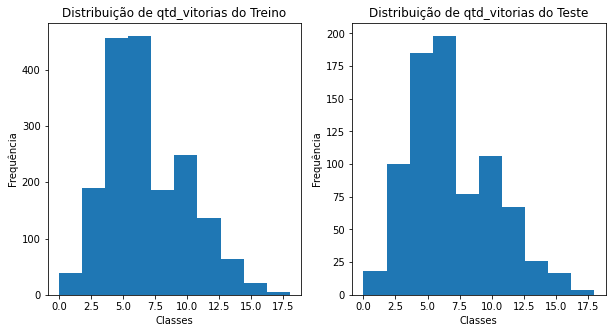

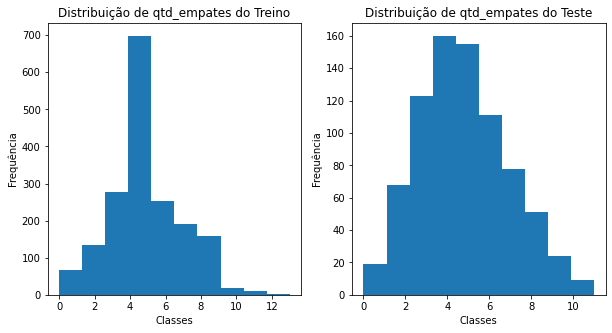

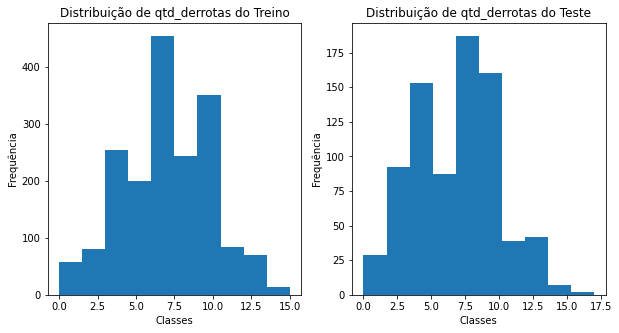

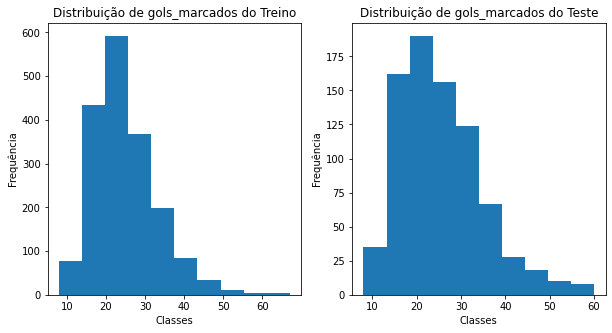

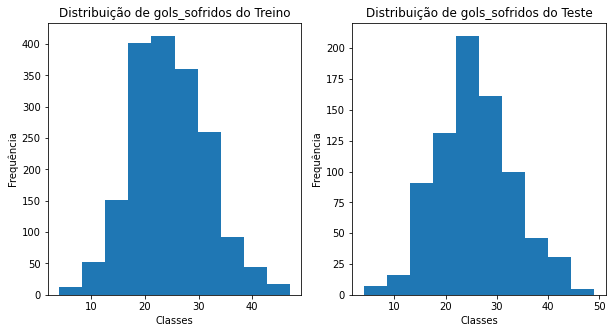

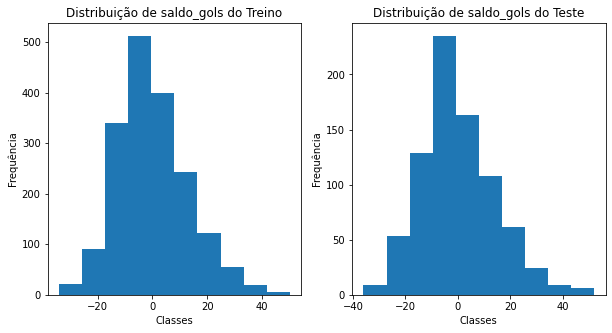

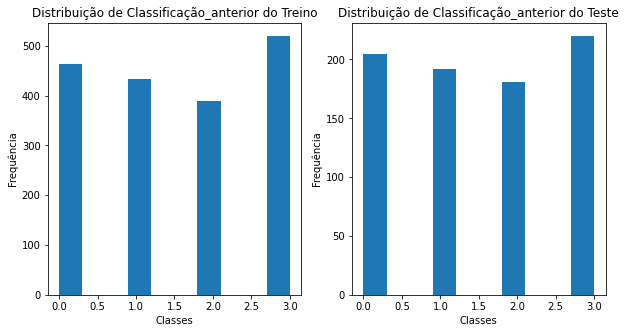

In [28]:
# indice 0 -  target, indice 1 qtd pontos, indice 2 qtd partidas, indice 3 qtd vitorias, indice 4 qtd empates, indice 5 qtd derrotas, indice 6 gols marcados, indice 7 gols sofridos, indice 8 saldo de gols, indice 9 classificação temporaria anterior
columNames = ['target','qtd_pontos','qtd_partidas','qtd_vitorias','qtd_empates','qtd_derrotas','gols_marcados','gols_sofridos','saldo_gols','Classificação_anterior']

for i in range(len(columNames)):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'Distribuição de {columNames[i]} do Treino')
    plt.hist(treino[f'{i}'], bins=10)
    plt.xlabel('Classes')
    plt.ylabel('Frequência')

    plt.subplot(1,2,2)
    plt.title(f'Distribuição de {columNames[i]} do Teste')
    plt.hist(teste[f'{i}'], bins=10)
    plt.xlabel('Classes')
    plt.ylabel('Frequência')

    plt.show()  

In [30]:
np.arange(len(columNames))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

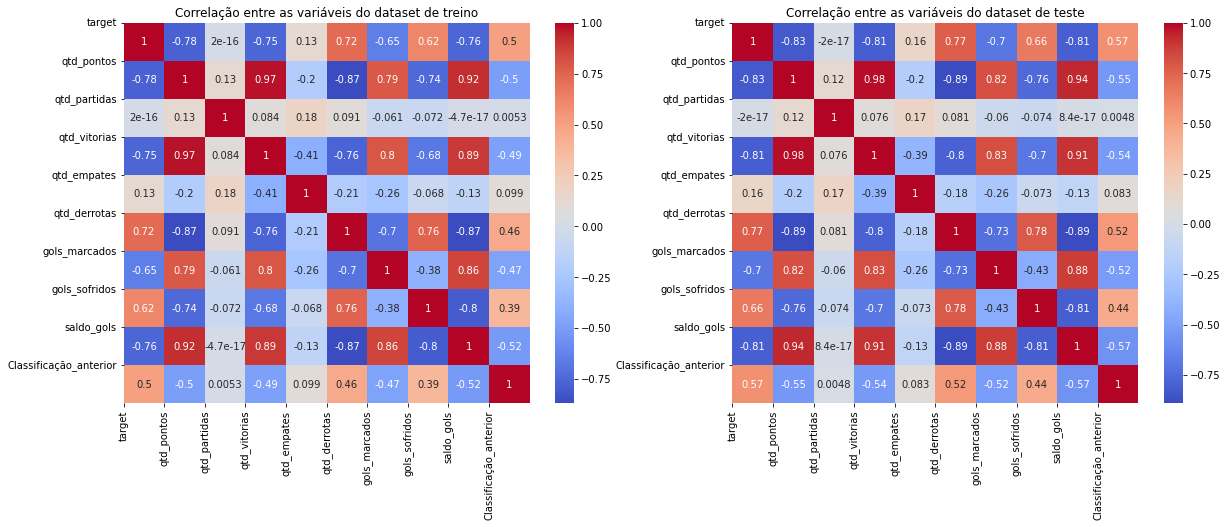

In [33]:
# heatmap

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)

plt.title('Correlação entre as variáveis do dataset de treino')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')


sns.heatmap(treino.corr(), annot=True, cmap='coolwarm')
#setar nome das colunas
plt.xticks(np.arange(len(columNames)), columNames, rotation=90)
plt.yticks(np.arange(len(columNames)), columNames, rotation=0)

plt.subplot(1,2,2)


plt.title('Correlação entre as variáveis do dataset de teste')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')


sns.heatmap(teste.corr(), annot=True, cmap='coolwarm')
#setar nome das colunas
plt.xticks(np.arange(len(columNames)), columNames, rotation=90, fontsize=10)
plt.yticks(np.arange(len(columNames)), columNames, rotation=0, fontsize=10)




plt.show()



In [7]:
teste.describe()

0           1           2           3           4           5  \
count  798.000000  798.000000  798.000000  798.000000  798.000000  798.000000   
mean     1.500000   25.384712   18.548872    6.854637    4.839599    6.854637   
std      1.131005    9.278684    0.836431    3.290063    1.980288    3.067852   
min      0.000000    4.000000   17.000000    0.000000    0.000000    0.000000   
25%      0.000000   19.000000   19.000000    4.000000    3.000000    5.000000   
50%      1.500000   25.000000   19.000000    6.000000    5.000000    7.000000   
75%      3.000000   31.000000   19.000000    9.000000    6.000000    9.000000   
max      3.000000   55.000000   19.000000   18.000000   11.000000   17.000000   

                6           7           8           9  
count  798.000000  798.000000  798.000000  798.000000  
mean    25.459900   25.459900    0.000000    1.521303  
std      9.260906    7.485512   14.211081    1.147327  
min      8.000000    4.000000  -36.000000    0.000000  
25%     19.000000   20.000000   -9.000000    0.000000  
50%     24.000000   25.000000   -2.000000    2.000000  
75%     30.000000   30.000000    8.000000    3.000000  
max     60.000000   49.000000   52.000000    3.000000

In [8]:
treino.describe()

0            1            2            3            4  \
count  1806.00000  1806.000000  1806.000000  1806.000000  1806.000000   
mean      1.50000    25.216501    18.461794     6.800664     4.860465   
std       1.13164     8.641277     0.887233     3.080475     2.022428   
min       0.00000     4.000000    17.000000     0.000000     0.000000   
25%       0.00000    19.000000    17.000000     5.000000     3.000000   
50%       1.50000    24.000000    19.000000     6.000000     5.000000   
75%       3.00000    31.000000    19.000000     9.000000     6.000000   
max       3.00000    55.000000    19.000000    18.000000    13.000000   

                 5            6            7          8            9  
count  1806.000000  1806.000000  1806.000000  1806.0000  1806.000000  
mean      6.800664    24.624031    24.624031     0.0000     1.534884  
std       2.856905     8.247881     7.053327    12.7398     1.156770  
min       0.000000     8.000000     4.000000   -34.0000     0.000000  
25%       5.000000    19.000000    20.000000    -8.0000     0.000000  
50%       7.000000    23.000000    24.000000    -1.0000     2.000000  
75%       9.000000    29.000000    29.000000     7.0000     3.000000  
max      15.000000    67.000000    47.000000    50.0000     3.000000

### Usando Arvore de decisão

In [9]:
# Dividir os dados em treino e teste

Y = treino['0']
X = treino.drop('0', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
tree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features=None, criterion='gini')
tree.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, tree.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, tree.predict(X_test))))
print(classification_report(y_test, tree.predict(X_test)))



Ein: 0.4176
Eout: 0.3950
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        87
           1       0.46      0.48      0.47        77
           2       0.46      0.21      0.29        89
           3       0.62      0.90      0.74       109

    accuracy                           0.60       362
   macro avg       0.58      0.59      0.57       362
weighted avg       0.59      0.60      0.58       362



In [11]:
treino.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

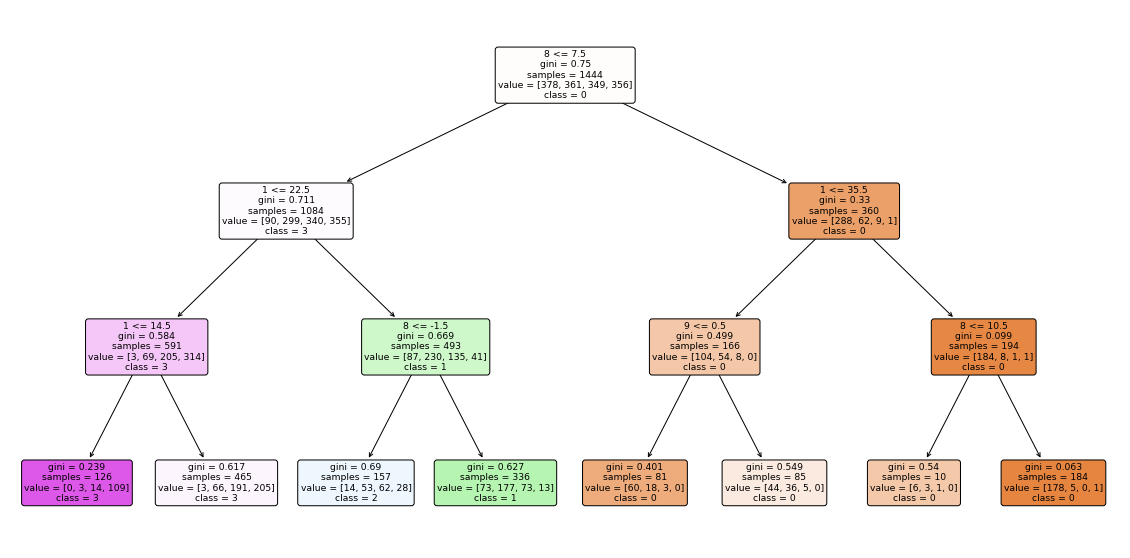

In [12]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True,
          rounded=True,
          feature_names=treino.columns[1:],
          class_names=["0", "1", "2", "3"])
plt.show()

In [13]:
## altura da árvore tree
print('Altura da árvore: %d' % tree.get_depth())
## tamanho  
print('Número de nós: %d' % tree.get_n_leaves())


Altura da árvore: 3
Número de nós: 8


In [14]:
# Poda

ccp_path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = {'ccp_alpha': ccp_path.ccp_alphas}

new_tree = GridSearchCV(estimator=tree, param_grid=alphas, cv = 10)
new_tree.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00144133, 0.00260718, 0.00765212, 0.01153639,
       0.01948018, 0.06661638, 0.13354241])})

In [15]:
new_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.011536390777338645, max_depth=3,
                       random_state=42)

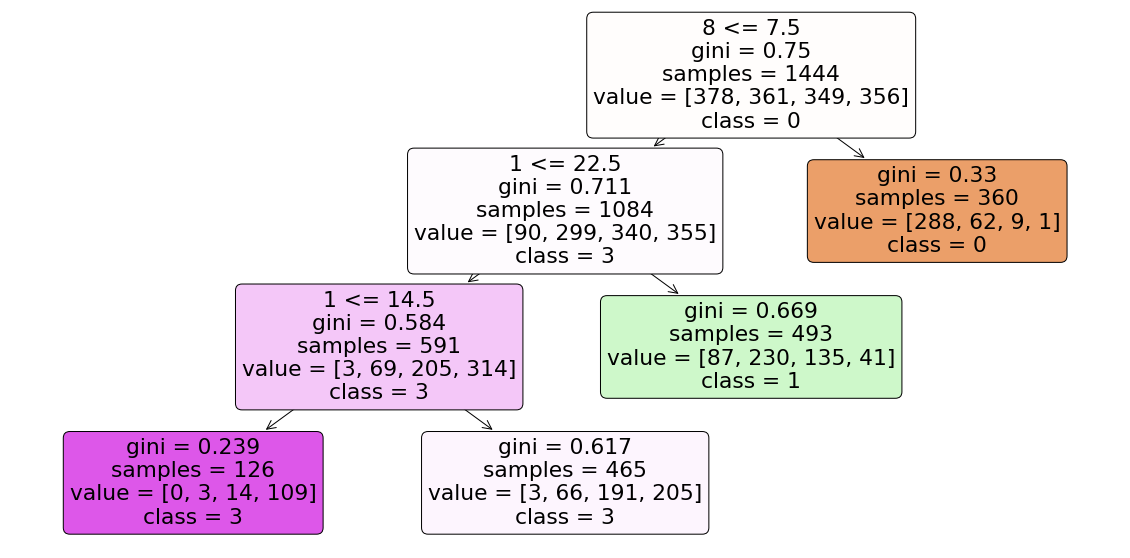

In [16]:
plt.figure(figsize=(20,10))
plot_tree(new_tree.best_estimator_,
          filled=True,
          rounded=True,
          feature_names=treino.columns[1:],
          class_names=["0", "1", "2", "3"])
plt.show()

In [17]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, new_tree.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, new_tree.predict(X_test))))
print(classification_report(y_test, new_tree.predict(X_test)));

Ein: 0.4238
Eout: 0.4116
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        87
           1       0.41      0.65      0.51        77
           2       0.00      0.00      0.00        89
           3       0.62      0.90      0.74       109

    accuracy                           0.59       362
   macro avg       0.45      0.57      0.50       362
weighted avg       0.46      0.59      0.51       362



c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### Usando Redes Neurais

In [18]:
data_normalizado = treino.copy()
for column in data_normalizado.columns[1:]:
    data_normalizado[column] = (data_normalizado[column] - data_normalizado[column].min()) / (data_normalizado[column].max() - data_normalizado[column].min())

display(data_normalizado)

0         1    2         3         4         5         6         7  \
0     0  0.666667  1.0  0.611111  0.384615  0.200000  0.406780  0.395349   
1     0  0.588235  1.0  0.500000  0.538462  0.200000  0.322034  0.395349   
2     0  0.549020  1.0  0.500000  0.384615  0.333333  0.322034  0.302326   
3     0  0.529412  1.0  0.500000  0.307692  0.400000  0.457627  0.488372   
4     0  0.490196  1.0  0.444444  0.384615  0.400000  0.372881  0.511628   
...  ..       ...  ...       ...       ...       ...       ...       ...   
1801  3  0.274510  1.0  0.222222  0.461538  0.600000  0.152542  0.418605   
1802  2  0.235294  1.0  0.222222  0.307692  0.733333  0.355932  0.720930   
1803  3  0.196078  1.0  0.222222  0.153846  0.866667  0.152542  0.720930   
1804  3  0.176471  1.0  0.166667  0.307692  0.800000  0.135593  0.860465   
1805  2  0.156863  1.0  0.166667  0.230769  0.866667  0.220339  0.930233   

             8         9  
0     0.535714  0.666667  
1     0.476190  0.000000  
2     0.523810  0.333333  
3     0.523810  0.333333  
4     0.452381  1.000000  
...        ...       ...  
1801  0.345238  1.000000  
1802  0.333333  0.000000  
1803  0.190476  1.000000  
1804  0.107143  1.000000  
1805  0.130952  1.000000  

[1806 rows x 10 columns]

In [19]:
X = data_normalizado.drop('0', axis=1)
y = data_normalizado['0']

In [20]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=2, test_size=0.2)

In [21]:
# model = Sequential()
# model.add(Dense(70, input_dim=8, activation='relu'))
# model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
# model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
# print(model.summary())

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=16, callbacks=[es])

In [41]:
# Função para calcular o número mínimo de neurônios com base na fórmula da dimensão VC
def calculate_min_neurons(treino):
    return int((abs(treino.shape[0])-10)/(10*(treino.shape[1]+2))) + 1

# Calcular o número mínimo de neurônios
num_neurons = calculate_min_neurons(treino)
print(f"Quantidade de Neurônios da camada de acordo com dimensão VC: {num_neurons}")

Quantidade de Neurônios da camada de acordo com dimensão VC: 15


In [48]:
# Inicializar o modelo
model = Sequential()

# Adicionar a camada de entrada com o número de neurônios igual ao número de features
model.add(Dense(9, input_dim=X_train.shape[1], activation='relu'))


# Adicionar a camada oculta com o número de neurônios calculado
model.add(Dense(num_neurons, activation='relu'))


# Adicionar a camada de saída
model.add(Dense(4, activation='softmax'))

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumo do modelo
print(model.summary())

# Configurar parada antecipada (early stopping)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Convertendo os rótulos de saída para o formato one-hot encoded
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

# Agora, você pode treinar o modelo usando os rótulos one-hot encoded
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), epochs=200, batch_size=64)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 9)                 90        
                                                                 
 dense_20 (Dense)            (None, 15)                150       
                                                                 
 dense_21 (Dense)            (None, 4)                 64        
                                                                 
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
19/19 [==============================] - 6s 62ms/step - loss: 3.0352 - accuracy: 0.1922 - val_loss: 2.1540 - val_accuracy: 0.2042
Epoch 2/200
19/19 [==============================] - 0s 16ms/step - loss: 1.6917 - accuracy: 0.2848 - val_loss: 1.3580 - val_accuracy: 0.3564
Epoch 3/200
19/19 [============

In [51]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Garante que cada fold esteja balanceado
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Inicializa a lista de armazenar as acurácias de cada fold
accuracies = []

# Executa a validação para cada fold
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    # Inicializar o modelo
    model = Sequential()

    # Adicionar a camada de entrada com o número de neurônios igual ao número de features
    model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))

    # Adicionar a camada oculta com o número de neurônios calculado
    model.add(Dense(num_neurons, activation='relu'))

    # Adicionar a camada de saída
    model.add(Dense(4, activation='softmax'))

    # Compilar o modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Resumo do modelo
    print(model.summary())

    # Convertendo os rótulos de saída para o formato one-hot encoded
    y_train_one_hot = to_categorical(y_train_fold)
    y_val_one_hot = to_categorical(y_val_fold)

    # Treinar o modelo usando os rótulos one-hot encoded
    history = model.fit(X_train_fold, y_train_one_hot, validation_data=(X_val_fold, y_val_one_hot), epochs=100, batch_size=64, verbose=0)

    # Avaliar o modelo
    _, accuracy = model.evaluate(X_val_fold, y_val_one_hot, verbose=0)
    accuracies.append(accuracy)

# Calcular a acurácia média
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    7,    9,   10,   13,   14,\n            ...\n            1140, 1141, 1142, 1144, 1148, 1150, 1151, 1152, 1153, 1154],\n           dtype='int64', length=924)] are in the [columns]"

In [52]:
type(X_train)

pandas.core.frame.DataFrame

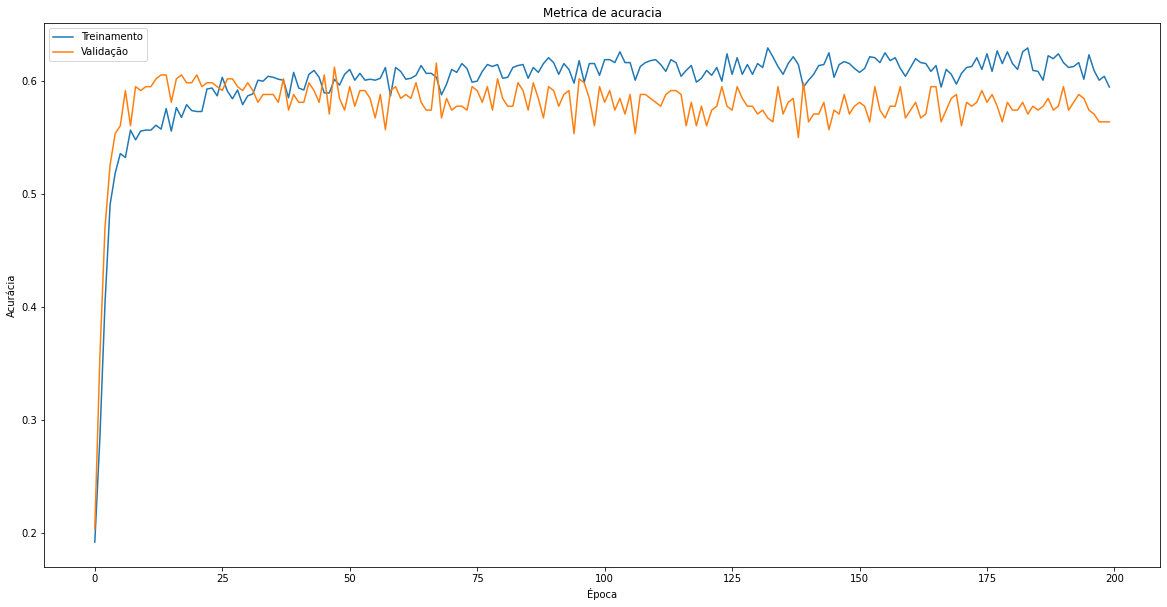

37/37 [==============================] - 0s 5ms/step

Acurácia (treinamento): 0.4346
Acurácia (validação): 0.4567


In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Metrica de acuracia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

pred = np.round(model.predict(X_val))
pred_train = np.round(model.predict(X_train))

# Calcular a acurácia usando a função accuracy_score
accuracy_train = accuracy_score(y_train_one_hot.argmax(axis=1), pred_train.argmax(axis=1))
accuracy_val = accuracy_score(y_val_one_hot.argmax(axis=1), pred.argmax(axis=1))
print(f'\nAcurácia (treinamento): {accuracy_train:.4f}')
print(f'Acurácia (validação): {accuracy_val:.4f}')


# accuracy_train = accuracy_score(y_train, pred_train)
# accuracy_val = accuracy_score(y_val, pred)
# print(f'\nAcurácia (treinamento): {accuracy_train:.4f}')
# print(f'Acurácia (validação): {accuracy_val:.4f}')

In [50]:
pred_test = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

# Converter as previsões do modelo para formato multiclasse
pred_test_multiclass = np.argmax(pred_test, axis=1)
pred_train_multiclass = np.argmax(pred_train, axis=1)

# Calcular e imprimir as métricas de acurácia
print(f'Acurácia (treino): {accuracy_score(y_train, pred_train_multiclass):.4f}')
print(f'Acurácia (teste): {accuracy_score(y_test, pred_test_multiclass):.4f}')

# Calcular e imprimir as taxas de erro
print(f'Ein: {1-accuracy_score(y_train, pred_train_multiclass):.4f}') 
print(f'Eout: {1-accuracy_score(y_test, pred_test_multiclass):.4f}')

# Imprimir o relatório de classificação
print('\nRelatório de Classificação:')
print(classification_report(y_test, pred_test_multiclass))


37/37 [==============================] - 0s 5ms/step
Acurácia (treino): 0.4346
Acurácia (teste): 0.4558
Ein: 0.5654
Eout: 0.5442

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.34      0.95      0.50        87
           1       0.63      0.16      0.25        77
           2       0.47      0.10      0.17        89
           3       0.76      0.56      0.65       109

    accuracy                           0.46       362
   macro avg       0.55      0.44      0.39       362
weighted avg       0.56      0.46      0.41       362

